# Polynomial Regression

What if your data is more complex than a straight line? Surprisingly, you can use a linear model to fit nonlinear
data. A simple way to do this is to add powers of each feature as new features, then train a linear model on this
extended set of features. This technique is called Polynomial Regression.

$$ y_i = \beta_0 + \beta_1x_i + \beta_2x_i^2 + \ldots + \beta_nx_i^n + \epsilon_i $$

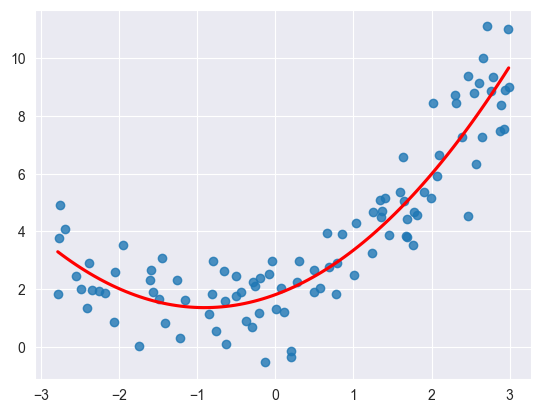

In [1]:
import numpy as np
import seaborn as sns

m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

sns.regplot(x=X,
            y=y,
            order=2,
            ci=None,
            line_kws={'color':'red'}
           );

## Examples

### Example 1 - Polynomial Regression

I want to predict the salary of an employee based on their position level

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
dataset = pd.read_csv('./data/Position_Salaries.csv')
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [4]:
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, -1].values

In [5]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [6]:
from sklearn.preprocessing import PolynomialFeatures
# the degree argument is the power n in the equation
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X)
# create the new object to train on the polynomial features
lin_reg_2 = LinearRegression()
# fit the model
lin_reg_2.fit(X_poly, y)

LinearRegression()

## Visualizing the results

Here's a visual representation of the linear regression model and the polynomial regression model.

First, the linear regression model: it doesn't fit the data well, as the data points are too far from the line.

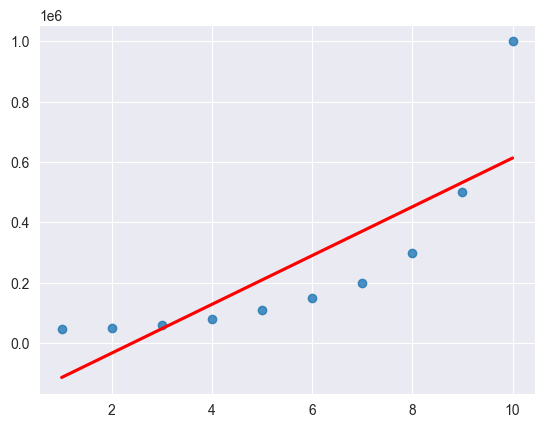

In [7]:
_ = sns.regplot(x=X,
            y=y,
            ci=None,
            line_kws={'color':'red'}
           )

Whereas the polynomial regression model fits better:

Text(0, 0.5, 'Salary')

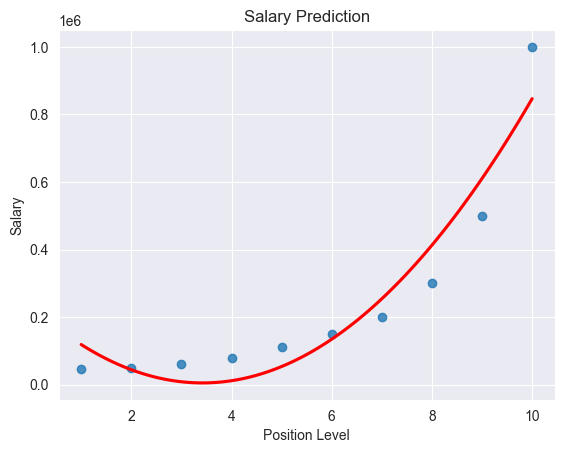

In [9]:
_ = sns.regplot(x=X,
            y=y,
            order=2,
            line_kws={'color':'red'},
            ci=None
           )
plt.title('Salary Prediction')
plt.xlabel('Position Level')
plt.ylabel('Salary')

Changing the matrix of features to a higher degree will give you a better fit. For example, changing the degree to 4:

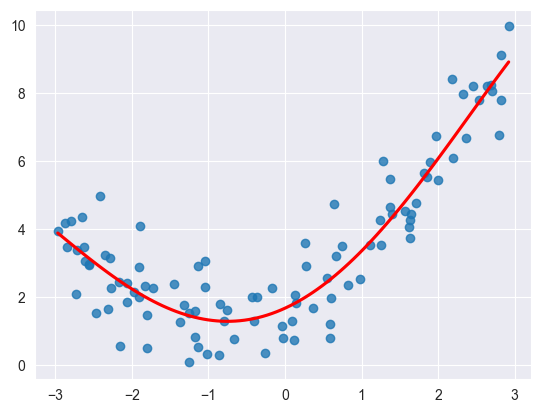

In [135]:
_ = sns.regplot(x=X,
            y=y,
            order=4,
            line_kws={'color':'red'},
            ci=None
           );

`RankWarning: Polyfit may be poorly conditioned` means that there's a problem with the matrix of features.

This is may be due to either:

1. Overfitting: the data may be noisy or sparse
2. Numerical instability: higher-degree polynomials involve very large and very small powers of x, which can cause numerical precision problems. Small rounding errors in the coefficients can lead to large deviations in the result.

I'm unable to find a solution to this problem, but I'll keep looking (and I welcome any suggestions).

Let's move on for now.

Predicting the salary of an employee with a position level of 6.5 using the linear regression model, with the assumption we'd expect a salary of $150,000:

In [12]:
lin_reg.predict([[6.5]])

array([330378.78787879])

If, instead, we use the polynomial regression model, we get a more accurate prediction:

In [13]:
lin_reg_2.predict(poly_reg.fit_transform([[6.5]]))

array([158862.45265155])

#### Example 2 - Polynomial Regression (random data)

In [142]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)

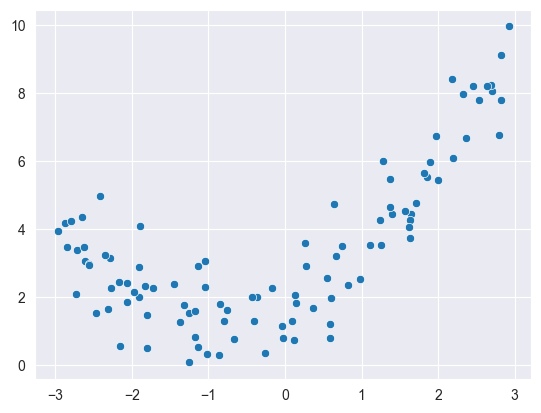

In [143]:
sns.scatterplot(x=X.flatten(), y=y.flatten())
plt.show()

A straight line will never fit this data properly.

To fit the data, we can use the `PolynomialFeatures` class to transform our training data, adding the square of each feature (only one, in this example) in the training set as a new feature.

`PolynomialFeatures(degree=d)` transforms an array containing $n$ features into an array containing $\frac{(n + d)!}{d!n!}$ features. That's a lot.

In [144]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-0.75275929])

The transformed features have the original feature of $x_1$ and the square of the feature $x_1^2$.

For instance, `X_poly[0]` contains $x_1 = -0.75275929$ and $x_1^2 = 0.56664654$.

In [145]:
X_poly[0]

array([-0.75275929,  0.56664654])

Now we can fit a `LinearRegression` model to this extended training data.

In [146]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

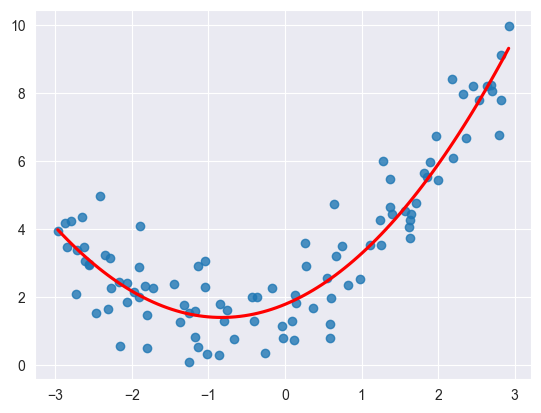

In [147]:
_ = sns.regplot(x=X.flatten(),
            y=y.flatten(),
            order=2,
            ci=None,
            line_kws={'color':'red'}
           )

The issue with a high-degree polynomial regression model is that while it may look like it's fitting the data well, it actually may do it *too* well and overfit the data.

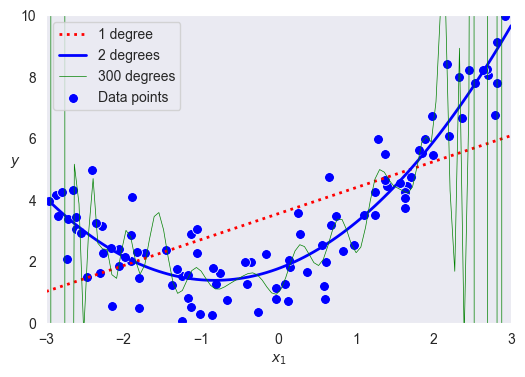

In [148]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Create a range of values for predictions
X_new = np.linspace(-3, 3, 100).reshape(100, 1)

# Set up the plot
plt.figure(figsize=(6, 4))

# Define styles, widths, and degrees for polynomial regression lines
styles = [("r:", 2, 1), ("b--", 2, 2), ("g-", 0.5, 300)]

# Plot polynomial regression lines
for style, width, degree in styles:
    # Create a pipeline for polynomial regression
    polynomial_regression = make_pipeline(
        PolynomialFeatures(degree=degree, include_bias=False),
        StandardScaler(),
        LinearRegression()
    )
    polynomial_regression.fit(X, y)  # Fit the model
    y_newbig = polynomial_regression.predict(X_new)  # Predict on new data
    label = f"{degree} degree{'s' if degree > 1 else ''}"
    sns.lineplot(x=X_new.flatten(), y=y_newbig.flatten(), linestyle=style[1], color=style[0], linewidth=width, label=label)

# Plot the original data points
sns.scatterplot(x=X.flatten(), y=y.flatten(), color="blue", s=50, label="Data points")

# Customize the plot
plt.legend(loc="upper left")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([-3, 3, 0, 10])
plt.grid()
plt.show()

The model can be evaluated using the `learning_curve()` function from sklearn: it trains and evaluates the model, by default retraining it on growing subsets of the training set.

The function returns the training set sizes at which it evaluated the model, and the training and validation scores it measured.

The learning curves below are typical of a model that's underfitting: 

- Train error: as more instances are added to the training set, the error on the training set increases until it reaches a point where adding new instances to the training set do not change the error.
- Validation error: initially, as there aren't enough training instances, it is unable to generalize well, so the error is quite large. As the model is trained on more examples, the validation error decreases until it reaches a plateau, very close to the training error.

The key takeaway is that if the model is *underfitting* the training data, adding more training examples will not help. You need to use a better model or come up with better features.

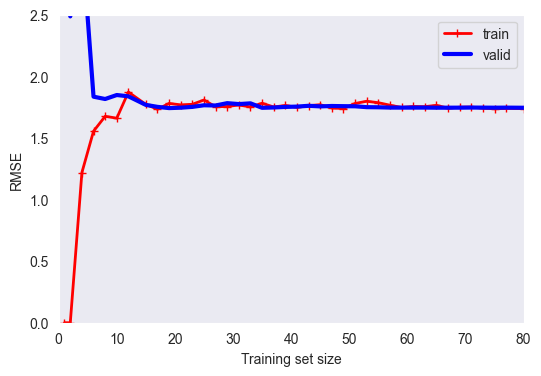

In [149]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(
    LinearRegression(), X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
    scoring="neg_root_mean_squared_error")
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.figure(figsize=(6, 4))  # extra code – not needed, just formatting
plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")

# extra code – beautifies and saves Figure 4–15
plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.grid()
plt.legend(loc="upper right")
plt.axis([0, 80, 0, 2.5])

plt.show()

If we're *overfitting* the data, on the other hand:

- The error on the training data is much lower than before.
- There is a gap between the curves. 

The gap means that the model performs significantly better on the training data than on the validation data, which is the hallmark of an *overfitting* model.

To improve an overfitting model feed more training data to the model until the validation error reaches the training error.




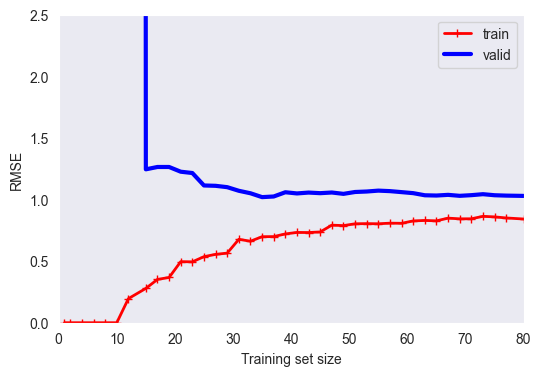

In [150]:
from sklearn.pipeline import make_pipeline

polynomial_regression = make_pipeline(
    PolynomialFeatures(degree=10, include_bias=False),
    LinearRegression())

train_sizes, train_scores, valid_scores = learning_curve(
    polynomial_regression, X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
    scoring="neg_root_mean_squared_error")

train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.figure(figsize=(6, 4))
plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")
plt.legend(loc="upper right")
plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.grid()
plt.axis([0, 80, 0, 2.5])
plt.show()

#### Example 3 - Polynomial Regression

In [237]:
df = pd.read_csv('./data/another_advertising.csv')

In [238]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [239]:
X = df.drop('sales', axis=1)
y = df['sales']

In [240]:
poly_convert = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_convert.fit_transform(X)

In [241]:
X.shape, X_poly.shape

((200, 3), (200, 9))

In [242]:
X.iloc[0]

TV           230.1
radio         37.8
newspaper     69.2
Name: 0, dtype: float64

`X_poly[0]` will return the original features, the interaction terms (i.e., $230.1 \times 37.8 \approx 8697.779$ , and the square of each interaction.

In [243]:
X_poly[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [244]:
X_poly[0][:3]

array([230.1,  37.8,  69.2])

In [245]:
X_poly[0][:3] ** 2

array([52946.01,  1428.84,  4788.64])

Train and test split the model:

In [246]:
from sklearn.model_selection import train_test_split

In [247]:
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=101)

Fit the model on the training data:

In [248]:
poly_model = LinearRegression(fit_intercept=True)

In [249]:
poly_model.fit(X_train, y_train)

LinearRegression()

In [250]:
test_pred = poly_model.predict(X_test)

In [251]:
def model_error_evaluation():
    from sklearn import metrics
    mae = metrics.mean_absolute_error(y_test, test_pred)
    mse = metrics.mean_squared_error(y_test, test_pred)
    rmse = np.sqrt(metrics.mean_squared_error(y_test, test_pred))
    print('MAE', round(mae, 3))
    print('MSE', round(mse, 3))
    print('RMSE', round(rmse, 3))
model_error_evaluation()

MAE 0.49
MSE 0.442
RMSE 0.665


Are we satisfied with this performance? Perhaps a higher order would improve performance even more! But how high is too high?

Let's use a for loop to do the following:

1. Create different order polynomial X data
2. Split that polynomial data for train/test
3. Fit on the training data
4. Report back the metrics on *both* the train and test results
5. Plot these results and explore overfitting


In [252]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

# TRAINING ERROR PER DEGREE
train_rmse_errors = []
# TEST ERROR PER DEGREE
test_rmse_errors = []

for d in range(1,10):

    # CREATE POLY DATA SET FOR DEGREE "d"
    poly_convert = PolynomialFeatures(degree=d,include_bias=False)
    X_poly = poly_convert.fit_transform(X)

    # SPLIT THIS NEW POLY DATA SET
    X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=101)

    # TRAIN ON THIS NEW POLY SET
    model = LinearRegression(fit_intercept=True)
    model.fit(X_train,y_train)

    # PREDICT ON BOTH TRAIN AND TEST
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    # Calculate Errors

    # Errors on Train Set
    train_RMSE = np.sqrt(mean_squared_error(y_train,train_pred))

    # Errors on Test Set
    test_RMSE = np.sqrt(mean_squared_error(y_test,test_pred))

    # Append errors to lists for plotting later


    train_rmse_errors.append(train_RMSE)
    test_rmse_errors.append(test_RMSE)

In [253]:
train_rmse_errors

[np.float64(1.734594124329376),
 np.float64(0.5879574085292234),
 np.float64(0.43393443569020657),
 np.float64(0.35170836883993556),
 np.float64(0.2509342923789987),
 np.float64(0.20953728390810636),
 np.float64(0.220468592026013),
 np.float64(0.27150074924450723),
 np.float64(0.5132041534764078)]

In [254]:
test_rmse_errors

[np.float64(1.5161519375993877),
 np.float64(0.6646431757269),
 np.float64(0.5803286825219469),
 np.float64(0.5077742640851456),
 np.float64(2.575819388953378),
 np.float64(9.87141360632477),
 np.float64(41.33052004954889),
 np.float64(3108.5907535489564),
 np.float64(12767.649350485362)]

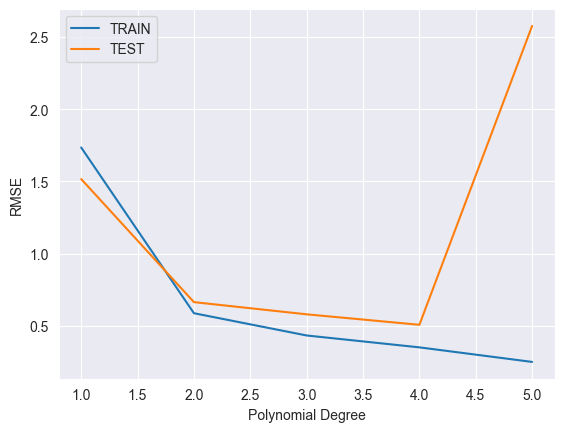

In [260]:
sns.lineplot(x=range(1,6),y=train_rmse_errors[:5],label='TRAIN')
sns.lineplot(x=range(1,6),y=test_rmse_errors[:5],label='TEST')
plt.xlabel("Polynomial Degree")
plt.ylabel("RMSE")
plt.show()

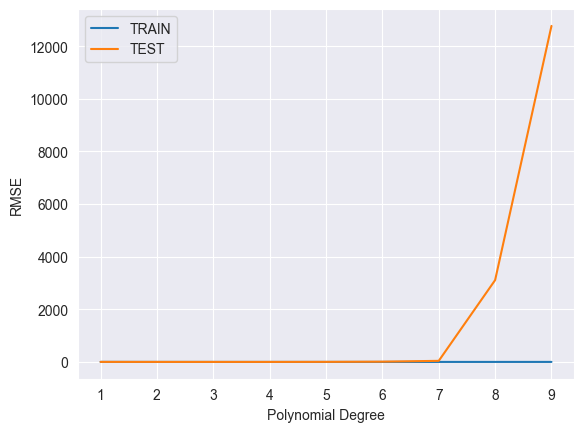

In [261]:
sns.lineplot(x=range(1,10),y=train_rmse_errors,label='TRAIN')
sns.lineplot(x=range(1,10),y=test_rmse_errors,label='TEST')
plt.xlabel("Polynomial Degree")
plt.ylabel("RMSE")
plt.show()

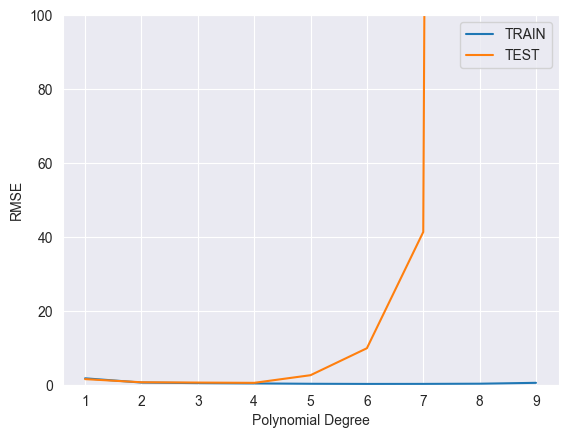

In [262]:
sns.lineplot(x=range(1,10),y=train_rmse_errors,label='TRAIN')
sns.lineplot(x=range(1,10),y=test_rmse_errors,label='TEST')
plt.xlabel("Polynomial Degree")
plt.ylabel("RMSE")
plt.ylim(0,100)
plt.show()